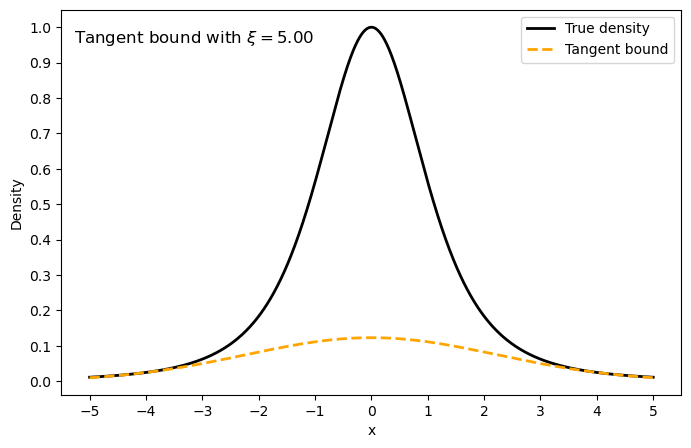

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MultipleLocator
from IPython.display import HTML

def true_density(x, nu=3):
    return (-(nu + 1) / 2) * np.log(1 + (x ** 2) / nu)

def lower_bound(x, xi, nu=3):
    r_xi = nu / xi + (nu + 1) * (np.log(xi) - np.log(nu / (nu + 1)) - 1)
    r_xi = 0 if xi < nu / (nu + 1) else r_xi
    return -(x ** 2) / (2 * xi) - r_xi / 2

x = np.linspace(-5, 5, 1000)
nu = 3
true = np.exp(true_density(x, nu))
xi_values = np.linspace(0.3, 5.0, 50)

fig, ax = plt.subplots(figsize=(8, 5))
line_true, = ax.plot(x, true, color='black', lw=2, label='True density')
line_bound, = ax.plot([], [], color='orange', lw=2, linestyle='--', label='Tangent bound')
text_label = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

def init():
    line_bound.set_data([], [])
    text_label.set_text('')
    return line_bound, text_label

def update(frame):
    xi = xi_values[frame]
    bound = np.exp(lower_bound(x, xi, nu))
    line_bound.set_data(x, bound)
    text_label.set_text(r"Tangent bound with $\xi={:.2f}$".format(xi))
    return line_bound, text_label

#ax.set_title("Tangent Minorizers to Student's t Likelihood (ν=3)", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend(loc='upper right')
ax.grid(False)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ani = FuncAnimation(fig, update, frames=len(xi_values), init_func=init, blit=True, repeat=True, interval=300)
HTML(ani.to_jshtml())

ani.save("tangent_bounds.gif", writer="pillow", fps=5)


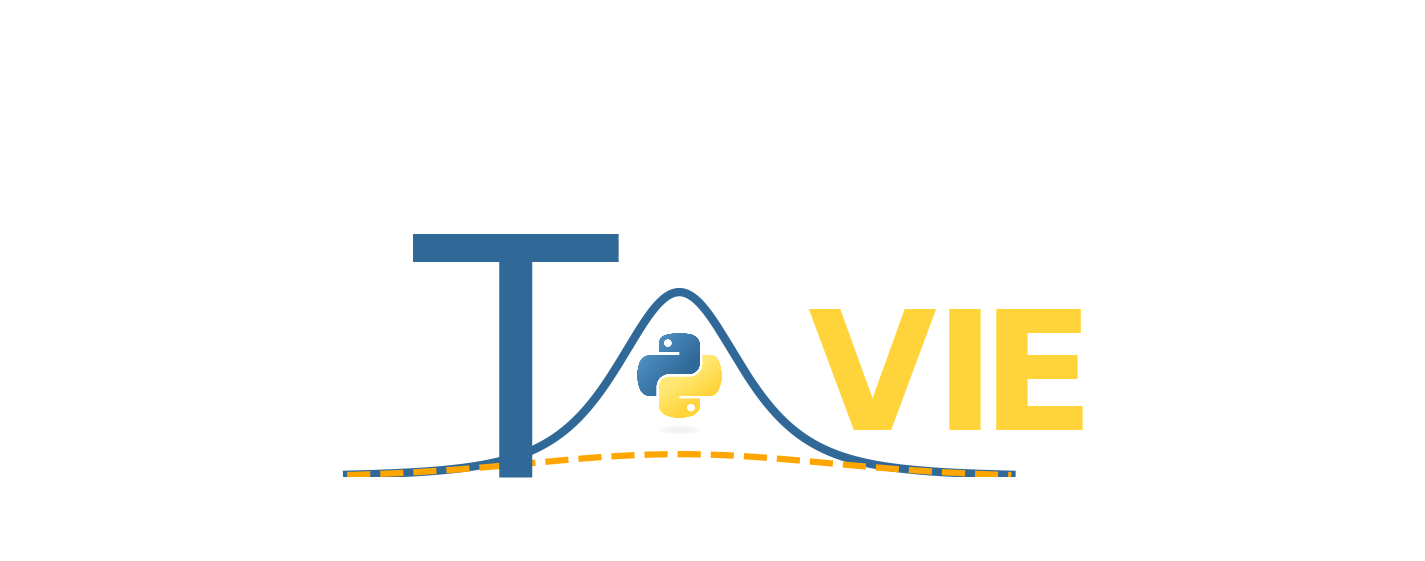

In [74]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

# ----- Tangent minorizers -----
def true_density(x, nu=3):
    return (-(nu + 1) / 2) * np.log(1 + (x ** 2) / nu)

def lower_bound(x, xi, nu=3):
    r_xi = nu / xi + (nu + 1) * (np.log(xi) - np.log(nu / (nu + 1)) - 1)
    r_xi = 0 if xi < nu / (nu + 1) else r_xi
    return -(x ** 2) / (2 * xi) - r_xi / 2

# ----- Setup grid and density -----
x = np.linspace(-5, 5, 1000)
nu = 3
true = np.exp(true_density(x, nu))
xi_values = np.linspace(0.3, 5.0, 50)

# ----- Set up figure -----
fig, ax = plt.subplots(figsize=(12, 4), dpi=150)  # High DPI for better quality
ax.set_xlim(-10, 11)
ax.set_ylim(0, 2.5)
ax.axis("off")
fig.patch.set_alpha(0.0)  # Transparent background

# ----- Color palette -----
python_blue = "#306998"
python_yellow = "#FFD43B"
tangent_color = "#FFA500"

# ----- Draw bold letters -----
ax.text(-4.0, 0.5, "T", fontsize=160, color=python_blue, ha='left', va='center')
ax.text(2.9, 0.5, "V", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')
ax.text(4.3, 0.5, "I", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')
ax.text(5.4, 0.5, "E", fontsize=80, weight='bold', color=python_yellow, ha='center', va='center')

# ----- Python logo overlay for "A" -----
python_logo = mpimg.imread("python_favicon.png")  # Must be transparent PNG
imagebox = OffsetImage(python_logo, zoom=0.15)
ab = AnnotationBbox(imagebox, (0, 0.5), frameon=False)
ax.add_artist(ab)

# ----- Animation line objects -----
line_true, = ax.plot(x, true, color=python_blue, lw=4, zorder=1)
line_bound, = ax.plot([], [], color=tangent_color, lw=3, linestyle='--', zorder=2)

# ----- Manual frame capture -----
frames = []
for xi in xi_values:
    bound = np.exp(lower_bound(x, xi, nu))
    line_bound.set_data(x, bound)
    fig.canvas.draw()
    
    # Convert canvas to RGBA image
    frame = np.array(fig.canvas.renderer.buffer_rgba())
    img = Image.fromarray(frame)
    frames.append(img.convert("RGBA"))

# ----- Save GIF -----
frames[0].save(
    "TAVIE_animated_logo.gif",
    save_all=True,
    append_images=frames[1:],
    duration=200,  # in ms per frame
    loop=0,
    disposal=2,     # Clear frame before next
    transparency=0  # Index 0 is assumed background
)

In [92]:
import sys
import os

# Get the parent directory of 'assets/' (i.e., project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Required imports
import numpy as np
from TAVIE import *
import pandas as pd
import rich
from sklearn.preprocessing import scale
from IPython.display import display, Latex
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from CompetingMethods import *
from time import perf_counter
from tqdm import tqdm, trange
from scipy.stats import t
import pandas as pd

### Test for TAVIE on Laplace likelihood (SSG Type I)

╭─ TAVIE Fit for laplace ─╮
│  Starting TAVIE fit!    │
╰─────────────────────────╯

Converged in 123 iterations.
-------------True parameters----------
beta: [ 1.11774678  1.72765749  0.08004577 -0.00207454 -0.13884604  0.67052432]
tau2: 8


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

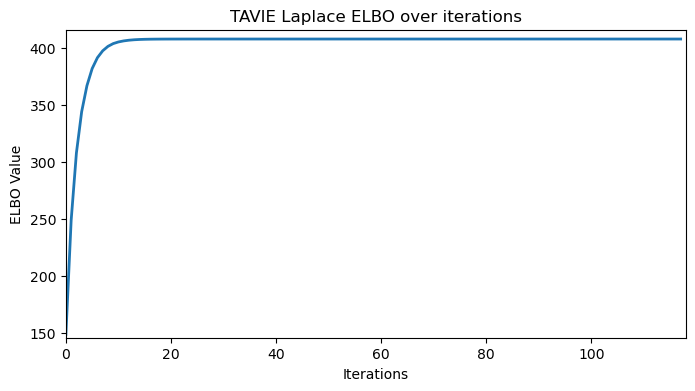

In [86]:
# Simulated data
n = 10000
p = 5
tau2 = 8

# Design matrix, true regression coefficients and response
X = np.random.normal(size=(n, p))
beta_true = np.random.normal(loc=0.0, scale=1.0, size=p+1)
error = np.random.laplace(size=n, loc=0.0, scale = 1/np.sqrt(tau2))
y = beta_true[0] + X @ beta_true[1:len(beta_true)] + error

# Initialize the TAVIE model for laplace likelihood
laplace_model = TAVIE_loc_scale(family="laplace", fit_intercept=True)
laplace_model.fit(X, y, verbose=True) # fit the TAVIE model

# true parameters
print("-------------True parameters----------")
print(f"beta: {beta_true}")
print(f"tau2: {tau2}")

laplace_model.get_TAVIE_means() # get the TAVIE estimates
ELBO = laplace_model.get_elbo() # get the ELBO across iterations
# obtain the variational parameter estimates; use variational_estimates as required
variational_estimates = laplace_model.get_variational_estimates()

ELBO = ELBO[6:]  # Trim the first few iterations if desired

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, len(ELBO))
ax.set_ylim(min(ELBO) * 0.98, max(ELBO) * 1.02)
ax.set_xlabel("Iterations")
ax.set_ylabel("ELBO Value")
ax.set_title("TAVIE Laplace ELBO over iterations")
line, = ax.plot([], [], lw=2)

# Init function
def init():
    line.set_data([], [])
    return line,

# Update function
def update(frame):
    xdata = np.arange(frame + 1)
    ydata = ELBO[:frame + 1]
    line.set_data(xdata, ydata)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(ELBO), init_func=init,
                    blit=True, interval=50)

HTML_display = HTML(ani.to_jshtml())
HTML_display

# Save the animation
ani.save("TAVIE_Laplace_ELBO_animation.gif", writer=PillowWriter(fps=20), dpi=150)

### Repeating the simulation experiment for Student's-t model using TAVIE, MFVI, and BBVI

In [98]:
# TAVIE model initialization
t_model = TAVIE_loc_scale(family="student", fit_intercept=True)

# Experiment parameters
n = 10000
p = 5
nu_true = 5
tau2_true = 8
num_reps = 50

# Containers for metrics
mse_beta_MFVI = np.zeros(num_reps)
mse_beta_BBVI = np.zeros(num_reps)
mse_beta_TAVIE = np.zeros(num_reps)
mse_tau2_MFVI = np.zeros(num_reps)
mse_tau2_BBVI = np.zeros(num_reps)
mse_tau2_TAVIE = np.zeros(num_reps)
time_TAVIE = np.zeros(num_reps)
time_MFVI = np.zeros(num_reps)
time_BBVI = np.zeros(num_reps)

# True beta vector
beta_true = np.random.normal(loc=2.0, scale=1.0, size=p+1)

# Main loop with progress bar
for rep in trange(num_reps, desc="Repetitions"):
    # Generate synthetic data
    X = np.random.normal(size=(n, p))
    X_bbvi = np.column_stack((np.ones(n), X))
    
    error = t.rvs(df=nu_true, size=n) / np.sqrt(tau2_true)
    y = beta_true[0] + X @ beta_true[1:len(beta_true)] + error

    # TAVIE estimator
    t0 = perf_counter()
    t_model.fit(X, y, nu=nu_true, verbose=False) # fitting the TAVIE model for Student's-t
    time_TAVIE[rep] = perf_counter() - t0
    beta_est, tau2_est = t_model.get_TAVIE_means(verbose=False) # obtaining the TAVIE estimates
    mse_beta_TAVIE[rep] = np.mean((beta_est - beta_true)**2)
    mse_tau2_TAVIE[rep] = (tau2_est - tau2_true)**2
    

    # MFVI estimator
    t0 = perf_counter()
    beta_hat, sigma_sq_hat, nu_hat = MFVI_Student(X_bbvi, y, 
                                                  mu_beta=np.zeros(p+1), Sigma_beta=np.eye(p+1), 
                                                  A=2, B=2, nu_min=2.0, 
                                                  nu_max=20.0, tol=1e-6, verbose = False)
    time_MFVI = perf_counter() - t0
    beta_est2 = beta_hat
    tau2_est2 = 1/sigma_sq_hat
    mse_beta_MFVI[rep] = np.mean((beta_est2 - beta_true)**2)
    mse_tau2_MFVI[rep] = (tau2_est2 - tau2_true)**2

    # BBVI estimator
    t0 = perf_counter()
    res2 = BBVI_student(X_bbvi, y, nu=nu_true)
    time_BBVI[rep] = perf_counter() - t0
    beta_est3 = res2['beta_mean']
    tau2_est3 = res2['tau2_mean']
    mse_beta_BBVI[rep] = np.mean((beta_est3 - beta_true)**2)
    mse_tau2_BBVI[rep] = (tau2_est3 - tau2_true)**2

Repetitions: 100%|██████████████████████████████| 50/50 [05:43<00:00,  6.86s/it]


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

# Length of repetitions
N = len(mse_tau2_TAVIE)

# Ensure runtime is a list
time_TAVIE = [time_TAVIE] * N if isinstance(time_TAVIE, float) else time_TAVIE
time_MFVI  = [time_MFVI] * N if isinstance(time_MFVI, float) else time_MFVI
time_BBVI  = [time_BBVI] * N if isinstance(time_BBVI, float) else time_BBVI

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Slightly wider
fig.subplots_adjust(wspace=0.4)  # Space between subplots

def init():
    for ax in axes:
        ax.clear()
    return axes

def update(frame):
    for ax in axes:
        ax.clear()

    # Tau^2 MSE
    axes[0].boxplot([
        mse_tau2_TAVIE[:frame+1], 
        mse_tau2_MFVI[:frame+1], 
        mse_tau2_BBVI[:frame+1]
    ], tick_labels=['TAVIE', 'MFVI', 'BBVI'])
    axes[0].set_title(r'$\tau^2$ $\ell_2$ error')
    axes[0].set_ylabel(r'$\ell_2$ error', labelpad=10)
    axes[0].grid(True)

    # Beta MSE
    axes[1].boxplot([
        mse_beta_TAVIE[:frame+1], 
        mse_beta_MFVI[:frame+1], 
        mse_beta_BBVI[:frame+1]
    ], tick_labels=['TAVIE', 'MFVI', 'BBVI'])
    axes[1].set_title(r'$\beta$ $\ell_2$ error')
    axes[1].set_ylabel(r'$\ell_2$ error', labelpad=10)
    axes[1].grid(True)

    # Log-runtime
    axes[2].boxplot([
        np.log(time_TAVIE[:frame+1]), 
        np.log(time_MFVI[:frame+1]), 
        np.log(time_BBVI[:frame+1])
    ], tick_labels=['TAVIE', 'MFVI', 'BBVI'])
    axes[2].set_title('Log-runtime Comparison')
    axes[2].set_ylabel('Log(Seconds)', labelpad=10)
    axes[2].grid(True)

    fig.tight_layout()  # Re-apply tight layout each frame
    return axes

# Create animation
ani = FuncAnimation(fig, update, frames=N, init_func=init, blit=False, interval=300)

# Display in Jupyter
HTML_display = HTML(ani.to_jshtml())

# Save the animation
ani.save("TAVIE_MFVI_BBVI_MSE_Runtime_Comparison.gif", writer=PillowWriter(fps=5), dpi=150)
plt.close()

# Show animation inline
HTML_display